In [1]:
from sklearn import datasets
X, y = datasets.make_blobs(100, 2, centers=2, random_state=1701, cluster_std=2)

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

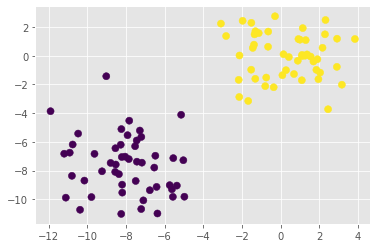

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [4]:
import numpy as np
from sklearn import model_selection as ms
X = X.astype(np.float32)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.1)

In [5]:
import cv2
model_norm = cv2.ml.NormalBayesClassifier_create()

In [6]:
model_norm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [7]:
_, y_pred = model_norm.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

In [8]:
def plot_decision_boundary(model, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
    x_hypo = np.column_stack((xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)))
    ret = model.predict(x_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

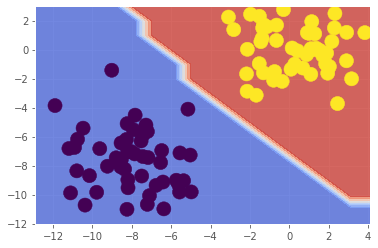

In [9]:
plot_decision_boundary(model_norm, X, y)

In [10]:
ret, y_pred, y_proba = model_norm.predictProb(X_test)

In [11]:
y_proba.round(2)#取小数点后两位进行四舍五入

array([[0.19, 0.  ],
       [0.  , 0.02],
       [0.  , 0.33],
       [0.  , 0.15],
       [0.14, 0.  ],
       [0.  , 0.17],
       [0.  , 0.17],
       [0.  , 0.02],
       [0.04, 0.  ],
       [0.  , 0.24]], dtype=float32)

In [15]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()

In [16]:
model_naive.fit(X_train, y_train)

GaussianNB()

In [17]:
model_naive.score(X_test, y_test)

1.0

In [19]:
yprob = model_naive.predict_proba(X_test)
yprob.round(2)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

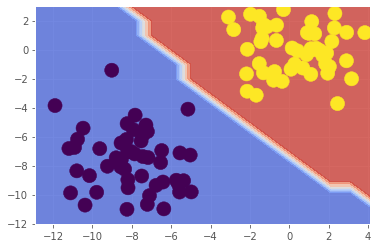

In [20]:
plot_decision_boundary(model_naive, X, y)

In [23]:
def plot_proba(model, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
    X_hypo = np.column_stack((xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)))
    if hasattr(model, 'predictProb'):
        _, _, y_proba = model.predictProb(X_hypo)
    else:
        y_proba = model.predict_proba(X_hypo)
    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

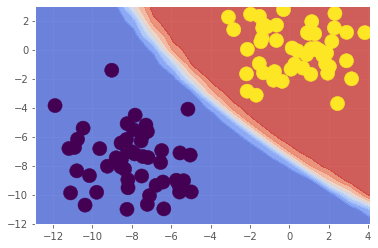

In [24]:
plot_proba(model_naive, X, y)

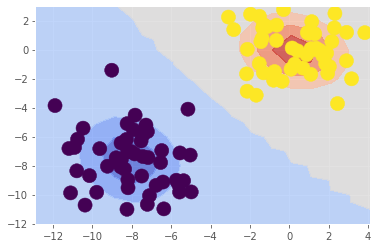

In [25]:
plot_proba(model_norm, X, y)